In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('Downloads/crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data = data.rename({'Unnamed: 0':'State'}, axis = 1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
scaler = MinMaxScaler()
scaler_df = scaler.fit_transform(data.iloc[:,1:])
print(scaler_df)

[[0.74698795 0.65410959 0.44067797 0.35917313]
 [0.55421687 0.74657534 0.27118644 0.96124031]
 [0.43975904 0.85273973 0.81355932 0.6124031 ]
 [0.48192771 0.49657534 0.30508475 0.31524548]
 [0.4939759  0.79109589 1.         0.86046512]
 [0.42771084 0.54452055 0.77966102 0.81136951]
 [0.15060241 0.22260274 0.76271186 0.09819121]
 [0.30722892 0.6609589  0.6779661  0.21963824]
 [0.87951807 0.99315068 0.81355932 0.63565891]
 [1.         0.56849315 0.47457627 0.47803618]
 [0.27108434 0.00342466 0.86440678 0.33333333]
 [0.10843373 0.25684932 0.37288136 0.17829457]
 [0.57831325 0.69863014 0.86440678 0.43152455]
 [0.38554217 0.23287671 0.55932203 0.35400517]
 [0.08433735 0.03767123 0.42372881 0.10335917]
 [0.31325301 0.23972603 0.57627119 0.27648579]
 [0.53614458 0.21917808 0.33898305 0.23255814]
 [0.87951807 0.69863014 0.57627119 0.38501292]
 [0.07831325 0.13013699 0.3220339  0.0129199 ]
 [0.63253012 0.87328767 0.59322034 0.52971576]
 [0.21686747 0.35616438 0.89830508 0.23255814]
 [0.68072289 

In [8]:
EPS = [0.22, 0.24, 0.26,0.28, 0.30]

for n in EPS:
    dbscan = DBSCAN(eps=n, min_samples=4)
    dbscan.fit(scaler_df)
    y=pd.DataFrame(dbscan.fit_predict(scaler_df),columns=['clusterid_DBSCAN'])
    print(f'For eps = {n}','\n',y['clusterid_DBSCAN'].value_counts())
    # silhouette score
    #sil_score= silhouette_score(scaler_df, dbscan.labels_)
    #print(f'For eps silhouette score = {n}','\n', sil_score)

For eps = 0.22 
 -1    32
 0    18
Name: clusterid_DBSCAN, dtype: int64
For eps = 0.24 
 -1    22
 1    20
 0     4
 2     4
Name: clusterid_DBSCAN, dtype: int64
For eps = 0.26 
  1    29
-1    17
 0     4
Name: clusterid_DBSCAN, dtype: int64
For eps = 0.28 
  2    29
-1     8
 1     7
 0     6
Name: clusterid_DBSCAN, dtype: int64
For eps = 0.3 
  1    37
 0     7
-1     6
Name: clusterid_DBSCAN, dtype: int64


In [9]:
dbscan = DBSCAN(eps=0.28, min_samples=4)
dbscan.fit(scaler_df)

DBSCAN(eps=0.28, min_samples=4)

In [10]:
data['clusterid_DBSCAN'] = dbscan.labels_
data.head()

,State,Murder,Assault,UrbanPop,Rape,clusterid_DBSCAN
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,-1


In [11]:
data.groupby('clusterid_DBSCAN').agg(['mean']).reset_index()

,clusterid_DBSCAN,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,10.387500,228.125000,74.125000,32.937500
1,0,14.216667,258.000000,53.333333,21.000000
2,1,11.014286,262.571429,77.142857,28.800000
3,2,4.962069,114.724138,62.896552,16.224138


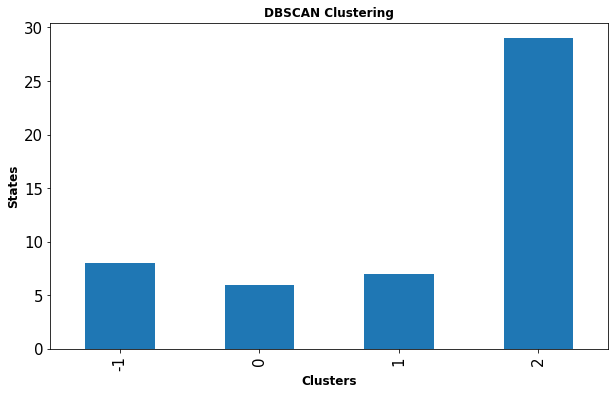

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clusterid_DBSCAN']).count()['State'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('States', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()


In [13]:
data[data['clusterid_DBSCAN']==0]

,State,Murder,Assault,UrbanPop,Rape,clusterid_DBSCAN
0,Alabama,13.2,236,58,21.2,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [15]:
data[data['clusterid_DBSCAN']==1]

,State,Murder,Assault,UrbanPop,Rape,clusterid_DBSCAN
2,Arizona,8.1,294,80,31.0,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
30,New Mexico,11.4,285,70,32.1,1
31,New York,11.1,254,86,26.1,1
42,Texas,12.7,201,80,25.5,1


In [16]:
data[data['clusterid_DBSCAN']==2]

,State,Murder,Assault,UrbanPop,Rape,clusterid_DBSCAN
3,Arkansas,8.8,190,50,19.5,2
6,Connecticut,3.3,110,77,11.1,2
11,Idaho,2.6,120,54,14.2,2
13,Indiana,7.2,113,65,21.0,2
14,Iowa,2.2,56,57,11.3,2
15,Kansas,6.0,115,66,18.0,2
16,Kentucky,9.7,109,52,16.3,2
18,Maine,2.1,83,51,7.8,2
20,Massachusetts,4.4,149,85,16.3,2
22,Minnesota,2.7,72,66,14.9,2


In [14]:
data[data['clusterid_DBSCAN']==-1]

,State,Murder,Assault,UrbanPop,Rape,clusterid_DBSCAN
1,Alaska,10.0,263,48,44.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1
10,Hawaii,5.3,46,83,20.2,-1
27,Nevada,12.2,252,81,46.0,-1
